# Credit Card Customer Classification
Created by: Andy Luc and Laura E. Shummon Maass

## Business Case:
Determine appropriate customers to market loans to. Find the main customer segments and target the customers we feel would be most interested and eligible for credit approvals.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')

## Data Cleansing:

In [2]:
#Looking at the raw data
raw_df = pd.read_csv('data/CCdata.csv')
raw_df.head().T

,0,1,2,3,4
CUST_ID,C10001,C10002,C10003,C10004,C10005
BALANCE,40.9007,3202.47,2495.15,1666.67,817.714
BALANCE_FREQUENCY,0.818182,0.909091,1,0.636364,1
PURCHASES,95.4,0,773.17,1499,16
ONEOFF_PURCHASES,0,0,773.17,1499,16
INSTALLMENTS_PURCHASES,95.4,0,0,0,0
CASH_ADVANCE,0,6442.95,0,205.788,0
PURCHASES_FREQUENCY,0.166667,0,1,0.083333,0.083333
ONEOFF_PURCHASES_FREQUENCY,0,0,1,0.083333,0.083333
PURCHASES_INSTALLMENTS_FREQUENCY,0.083333,0,0,0,0


In [3]:
raw_df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [4]:
df = raw_df.drop('CUST_ID', axis=1)

In [5]:
#Look to see if there are any null values
df.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
#Fill the Minimum Payments columns with 0
df.MINIMUM_PAYMENTS = df.MINIMUM_PAYMENTS.fillna(0)

#Since there is only 1 NaN in Credit Limit, we drop it
df = df.dropna()
df.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [7]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000
mean,1564.647593,0.877350,1003.316936,592.503572,411.113579,978.959616,0.490405,0.202480,0.364478,0.135141,3.249078,14.711476,4494.449450,1733.336511,834.075035,0.153732,11.517935
std,2081.584016,0.236798,2136.727848,1659.968851,904.378205,2097.264344,0.401360,0.298345,0.397451,0.200132,6.824987,24.858552,3638.815725,2895.168146,2336.104378,0.292511,1.337134
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,6.000000
25%,128.365782,0.888889,39.800000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.282850,163.029483,0.000000,12.000000
50%,873.680279,1.000000,361.490000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,857.062706,289.686899,0.000000,12.000000
75%,2054.372848,1.000000,1110.170000,577.830000,468.650000,1113.868654,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.279320,788.721609,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Text(0.5, 1.0, 'Multi-Collinearity of Car Attributes')

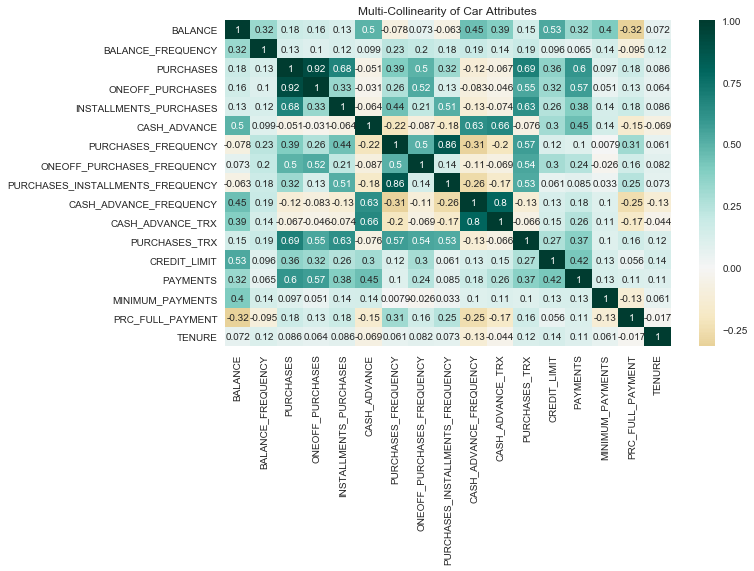

In [8]:

fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(df.corr(), center=0, cmap='BrBG', annot=True)

ax.set_title('Multi-Collinearity of Car Attributes')

In [9]:
#Dropping columns/features that either have collinearity and or irrelevant to our business statement
df = df.drop(['ONEOFF_PURCHASES', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_TRX',
              'TENURE', 'PAYMENTS', 'ONEOFF_PURCHASES_FREQUENCY', 'INSTALLMENTS_PURCHASES', 
              'CASH_ADVANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'BALANCE_FREQUENCY', 'PRC_FULL_PAYMENT'], axis=1)

In [10]:
#Credit Card approval: 1 = approved, 0 = denied
df['CC_APPROVAL'] = df.apply(lambda x: 1
                                 if x['CREDIT_LIMIT']>=3000
                                 and x['BALANCE']>=1000
                                 and x['CASH_ADVANCE']<=100
                                 else 0,
                                 axis=1)

df['P_AMOUNT_PER_TRX'] = df.apply(lambda x: 0 if x['PURCHASES_TRX'] == 0
                                      else x['PURCHASES']/x['PURCHASES_TRX'],
                                      axis=1)

df['BAL_PER_CL'] = df.apply(lambda x: 
                            x['BALANCE']/x['CREDIT_LIMIT'], 
                            axis=1)

In [11]:
df.head()

,BALANCE,PURCHASES,CASH_ADVANCE,PURCHASES_TRX,CREDIT_LIMIT,MINIMUM_PAYMENTS,CC_APPROVAL,P_AMOUNT_PER_TRX,BAL_PER_CL
0,40.900749,95.40,0.000000,2,1000.0,139.509787,0,47.700000,0.040901
1,3202.467416,0.00,6442.945483,0,7000.0,1072.340217,0,0.000000,0.457495
2,2495.148862,773.17,0.000000,12,7500.0,627.284787,1,64.430833,0.332687
3,1666.670542,1499.00,205.788017,1,7500.0,0.000000,0,1499.000000,0.222223
4,817.714335,16.00,0.000000,1,1200.0,244.791237,0,16.000000,0.681429


## K-Means Clustering

In [12]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import calinski_harabaz_score, silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

- As Credit Card Approval will be our target variable, we will drop this value from the dataframe. This will be set as "y" and later used in the classifications models following the clusters.

In [13]:
df_cluster = df.drop(['CC_APPROVAL'], axis=1)

Normalizing the dataset:

In [14]:
ss = StandardScaler()
scaled_data = ss.fit_transform(df_cluster.astype(float))

In [15]:
scaled_df=pd.DataFrame(data=scaled_data, columns=df_cluster.columns)
scaled_df.head().T

,0,1,2,3,4
BALANCE,-0.732054,0.786858,0.447041,0.049015,-0.358849
PURCHASES,-0.424934,-0.469584,-0.107716,0.231995,-0.462095
CASH_ADVANCE,-0.466805,2.605438,-0.466805,-0.368678,-0.466805
PURCHASES_TRX,-0.511381,-0.591841,-0.109082,-0.551611,-0.551611
CREDIT_LIMIT,-0.960380,0.688601,0.826016,0.826016,-0.905414
MINIMUM_PAYMENTS,-0.297334,0.101998,-0.088524,-0.357057,-0.252265
P_AMOUNT_PER_TRX,-0.163085,-0.460239,-0.058858,8.877985,-0.360565
BAL_PER_CL,-0.893059,0.175953,-0.144316,-0.427774,0.750582


### Principle Component Analysis (PCA)
Dimentionality Reduction - Integrating a multi-dimensional space (columns) into 2 dimensions to make evaluating our business case easier to understand. There is no particular meaning assigned to each principle component, as the new components are just 2 main dimensions of the variation. It is also easier to view visually on a graph.

In [16]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_df)

pca_df = pd.DataFrame(data=pca_data, columns=['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.620711,-0.123466
1,1.281014,1.694603
2,0.312917,-0.140090
3,0.590824,-2.531177
4,-1.003864,0.774606


### Graphs to find optimal K for cluster size categorization:
You will see below that the Elbow graph does not give a clear indication of an optimal K, however the Silhouette graph does.
#### Elbow Graph

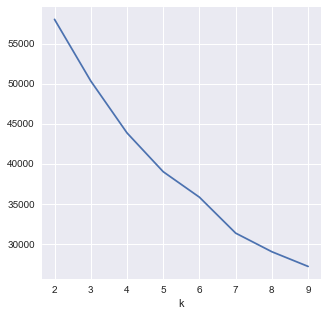

In [17]:
X = scaled_data
distorsions = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=10)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

plt.figure(figsize=(5,5))
plt.xlabel('k')
plt.plot(range(2, 10), distorsions)
plt.grid(True)

#### Silhouette Graph

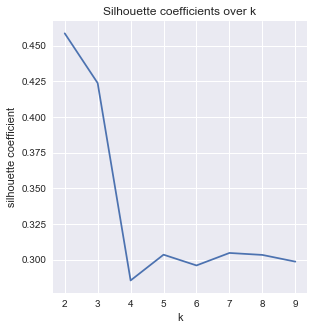

In [18]:
# Silhouette coefficient for each k, finding optimal K for cluster size categorization
X = scaled_data
silhouette_plot = []
for k in range(2, 10):
    clusters = KMeans(n_clusters=k, random_state=10)
    cluster_labels = clusters.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_plot.append(silhouette_avg)
    
plt.figure(figsize=(10,5))
plt.subplot(121, title='Silhouette coefficients over k')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.plot(range(2, 10), silhouette_plot)
plt.grid(True)

In [19]:
model = KMeans(n_clusters=4, random_state=10).fit(pca_df)
model_label = model.labels_
model_centers = model.cluster_centers_
sorted(model_centers.tolist())

[[-0.8210639495823528, -0.5811139229694008],
 [-0.07236001954236465, 0.8563341077284465],
 [2.733886458366353, -2.9072326038741103],
 [2.885879242126553, 1.7247498161372823]]

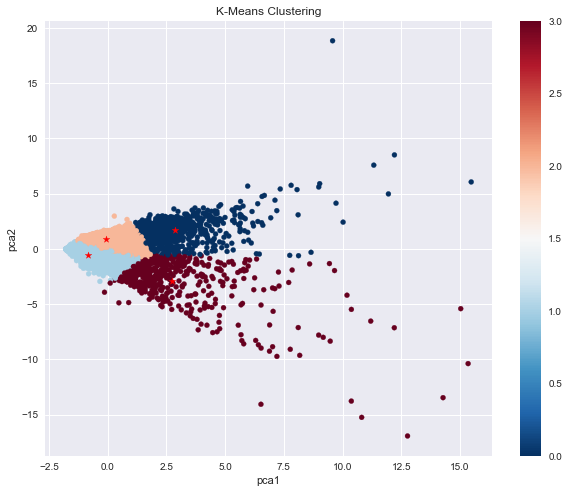

In [20]:
#Plotting the clusters
plt.figure(figsize=(10,8))

plt.title('K-Means Clustering')
plt.xlabel('pca1')
plt.ylabel('pca2')

scatter = plt.scatter(pca_df['pca1'], pca_df['pca2'], c=model_label, s=25, cmap='RdBu_r')
plt.colorbar(scatter)
plt.scatter(model_centers[:,0], model_centers[:,1], c='red', marker='*');

In [21]:
pca_components = pd.DataFrame(pca.components_, columns=df_cluster.columns)
pca_components.head()

,BALANCE,PURCHASES,CASH_ADVANCE,PURCHASES_TRX,CREDIT_LIMIT,MINIMUM_PAYMENTS,P_AMOUNT_PER_TRX,BAL_PER_CL
0,0.546309,0.350768,0.327741,0.314547,0.440276,0.331305,0.072011,0.251722
1,0.255330,-0.526204,0.334730,-0.475900,-0.169461,0.203870,-0.243475,0.435696


* Largest Values in pca1 = CREDIT_LIMIT, BALANCE
* Largest Values in pca2 = CASH_ADVANCE, BALANCE -- balance may be inflated due to borrowed money
* Smallest Values in pca1 = CASH_ADVANCE, PURCHASES_TRX
* Smallest Values in pca2 = PURCHASES, PURCHASES_TRX

### Results from PCA:

Points far to the right are roughly correlated with higher credit limits, higher $ spent and higher balances... in other words these customers are likely wealthier and likely to be fairly reliable.

Points far to the top are roughly correlated with higher cash advances and high balances... the high balance may be an artifically inflated balance due to the cash advances made. These are customers who took large amounts of short term loans. 

In [22]:
scaled_df['GROUPS'] = model.labels_
scaled_df.head()

,BALANCE,PURCHASES,CASH_ADVANCE,PURCHASES_TRX,CREDIT_LIMIT,MINIMUM_PAYMENTS,P_AMOUNT_PER_TRX,BAL_PER_CL,GROUPS
0,-0.732054,-0.424934,-0.466805,-0.511381,-0.960380,-0.297334,-0.163085,-0.893059,1
1,0.786858,-0.469584,2.605438,-0.591841,0.688601,0.101998,-0.460239,0.175953,2
2,0.447041,-0.107716,-0.466805,-0.109082,0.826016,-0.088524,-0.058858,-0.144316,2
3,0.049015,0.231995,-0.368678,-0.551611,0.826016,-0.357057,8.877985,-0.427774,3
4,-0.358849,-0.462095,-0.466805,-0.551611,-0.905414,-0.252265,-0.360565,0.750582,2


## Radar Plots

In [23]:
import plotly.plotly as py
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [24]:
scaled_groups_df = scaled_df.groupby(['GROUPS']).mean().groupby(['BALANCE']).mean()
scaled_groups_df = scaled_groups_df.reset_index()
scaled_groups_df

,BALANCE,PURCHASES,CASH_ADVANCE,PURCHASES_TRX,CREDIT_LIMIT,MINIMUM_PAYMENTS,P_AMOUNT_PER_TRX,BAL_PER_CL
0,-0.588181,-0.068829,-0.396177,-0.050549,-0.158329,-0.265272,0.090072,-0.709777
1,0.137409,-0.319126,0.124753,-0.340468,-0.339417,0.007848,-0.225706,0.770458
2,0.684769,2.572609,-0.187772,2.551238,1.461898,0.176345,0.718538,-0.148362
3,2.174224,-0.088014,1.764643,-0.090136,1.193426,1.274363,-0.086291,0.943646


In [25]:
Group_1 = scaled_groups_df.loc[0,:]
Group_2 = scaled_groups_df.loc[1,:]
Group_3 = scaled_groups_df.loc[2,:]
Group_4 = scaled_groups_df.loc[3,:]

In [26]:
labels = np.array(['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'PURCHASES_TRX', 'CREDIT_LIMIT',
                   'MINIMUM_PAYMENTS', 'P_AMOUNT_PER_TRX', 'BAL_PER_CL'])
stats=scaled_df.loc[:,'GROUPS'].values

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

def radar_plot(group, limit):
    """Applying each group of clusters to illustrate variances between them"""
    data = [go.Scatterpolar(
      r = [abs(group[0]), abs(group[1]), abs(group[2]), abs(group[3]),
           abs(group[4]), abs(group[5]), abs(group[6]),abs(group[7])],
      theta = labels,
      fill = 'toself'
    )]

    layout = go.Layout(
      polar = dict(
        radialaxis = dict(
          visible = True,
          range = [0, limit]
        )
      ),
      showlegend = False
    )

    fig = go.Figure(data=data, layout=layout)
    return(py.iplot(fig))

### Group 1: Inactive Users (relatively)
Small purchases & high remaining balance. Possibly students with cash advances.

In [27]:
radar_plot(Group_1, 0.8)

/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



### Group 2: Responsible Customers (Low Risk)
Average purchases, average cash advances, high balance to credit limit ratio.

In [28]:
radar_plot(Group_2, 0.8)

/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



### Group 3: Financially Irresponsible
Frequent Spenders - High purchases coupled with both a low remaining balance and some cash advances. However, they have low minimum payments, which means they pay off their debt.

In [29]:
radar_plot(Group_3, 3)

/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



### Group 4: Loaners
Zero to minimal purchases and have cash advances with high minimum payments. Most likely in-line with house mortgages or car payments.

In [30]:
radar_plot(Group_4, 2.5)

/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



## Classification / Regression Models

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, accuracy_score, f1_score

In [32]:
#Setting X and y variables, then Train Test Split
X = df.drop('CC_APPROVAL', axis=1)
y = df.CC_APPROVAL

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

## Logistic Regression

In [33]:
loreg = LogisticRegression(solver='lbfgs', max_iter=1000)
loreg.fit(X_train, y_train)
loreg_preds = loreg.predict(X_test)

In [34]:
def print_metrics(y, loreg_preds):
    print("Precision Score: {}".format(precision_score(y, loreg_preds)))
    print("Recall Score: {}".format(recall_score(y, loreg_preds)))
    print("Accuracy Score: {}".format(accuracy_score(y, loreg_preds)))
    print("F1 Score: {}".format(f1_score(y, loreg_preds)))
    
print_metrics(y_test, loreg_preds)

Precision Score: 0.9315789473684211
Recall Score: 0.8349056603773585
Accuracy Score: 0.9785522788203753
F1 Score: 0.8805970149253731


**Precision** measures how precise our predictions are.     
*Precision = (True Positives / Pred Positives)*             

**Recall** tells us what percentage of the class(es) we're interested in were actually captured by the model.     
*Recall = (True Positives / Actual Total Positives)*     

**Accuracy** measures the total number of predictions our model got right, including both True Positives and True Negatives.     
*Accuracy = (True Pos + True Neg) / Total Observations*     

**F1-Score** represents the harmonic Mean of Precision and Recall. How well the model is doing overall.     
*F1-Score = 2*(Precision x Recall)/(Precision + Recall)

AUC: 0.9912505354914414


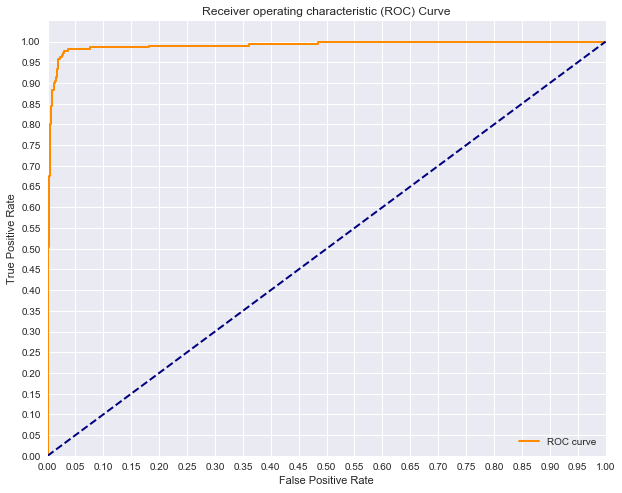

In [35]:
y_score = loreg.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score)
print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## K-Nearest Neighbors

In [36]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
preds = clf.predict(X_test)

In [37]:
def print_metrics(y, preds):
    print("Precision Score: {}".format(precision_score(y, preds)))
    print("Recall Score: {}".format(recall_score(y, preds)))
    print("Accuracy Score: {}".format(accuracy_score(y, preds)))
    print("F1 Score: {}".format(f1_score(y, preds)))
    
print_metrics(y_test, preds)

Precision Score: 0.7797356828193832
Recall Score: 0.8349056603773585
Accuracy Score: 0.9620196604110813
F1 Score: 0.806378132118451


In [38]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))
find_best_k(X_train, y_train, X_test, y_test)

Best Value for k: 3
F1-Score: 0.806378132118451


AUC: 0.9775594162677642


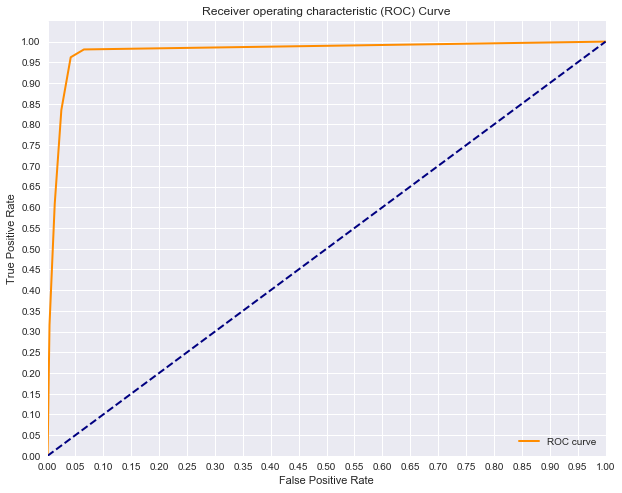

In [39]:
y_scores = clf.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])
print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
        lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Decision Tree
Experimental - determined to *NOT* be useful as it essentially categorizes a customer *perfectly* based on the target variable.

In [40]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc

In [41]:
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [42]:
#Calculate Accuracy
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy is :{0}".format(acc))

#Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("\nAUC is :{0}".format(round(roc_auc,2)))

#Create and print a confusion matrix
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy is :100.0

AUC is :1.0

Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,2026,0,2026
1,0,212,212
All,2026,212,2238


## Summary

In this project, we clustered our data using unsupervised learning methods with the K-means clustering model to determine 4 groups of customers. The 4 groups were Inactive Users, Responsible Customers, Financially Irresponsible, and Loaners.

Based on our K-means model alone, we can classify which groups we would target: Responsible Customers and Financially Irresponsible. Both hold a lot of weight in terms of action in general, and their minimum payments are relatively low.

Both of our classifications models, logistic regression and K-nearest neightbors did exceptionally well because our target variable (y) was derived of what we set as a baseline to approve or decline a credit card application. This baseline can be set per a national average or however a financial institution would like it to be based on what type of credit card it is or how the business is run.